In [1]:
import uproot
import pandas as pd
import numpy as np
from pylorentz import Momentum4
import matplotlib.pyplot as plt

In [2]:
tree_tt = uproot.open("/vols/cms/dw515/Offline/output/SM/master_gen_ntuple_1502/MVAFILE_tt.root")["ntuple"]

In [3]:
tree_tt.keys()

[b'rand',
 b'wt_cp_sm',
 b'wt_cp_ps',
 b'wt_cp_mm',
 b'pi_px_1',
 b'pi_py_1',
 b'pi_pz_1',
 b'pi_E_1',
 b'pi2_px_1',
 b'pi2_py_1',
 b'pi2_pz_1',
 b'pi2_E_1',
 b'pi3_px_1',
 b'pi3_py_1',
 b'pi3_pz_1',
 b'pi3_E_1',
 b'pi_px_2',
 b'pi_py_2',
 b'pi_pz_2',
 b'pi_E_2',
 b'pi2_px_2',
 b'pi2_py_2',
 b'pi2_pz_2',
 b'pi2_E_2',
 b'pi3_px_2',
 b'pi3_py_2',
 b'pi3_pz_2',
 b'pi3_E_2',
 b'pi0_px_1',
 b'pi0_py_1',
 b'pi0_pz_1',
 b'pi0_E_1',
 b'pi0_px_2',
 b'pi0_py_2',
 b'pi0_pz_2',
 b'pi0_E_2',
 b'nu_px_1',
 b'nu_py_1',
 b'nu_pz_1',
 b'nu_E_1',
 b'nu_px_2',
 b'nu_py_2',
 b'nu_pz_2',
 b'nu_E_2',
 b'sv_x_1',
 b'sv_y_1',
 b'sv_z_1',
 b'sv_x_2',
 b'sv_y_2',
 b'sv_z_2',
 b'ip_x_1',
 b'ip_y_1',
 b'ip_z_1',
 b'ip_x_2',
 b'ip_y_2',
 b'ip_z_2',
 b'dm_1',
 b'dm_2',
 b'metx',
 b'mety',
 b'reco_sv_x_1',
 b'reco_sv_y_1',
 b'reco_sv_z_1',
 b'reco_ip_x_1',
 b'reco_ip_y_1',
 b'reco_ip_z_1',
 b'reco_dm_1',
 b'reco_metx',
 b'reco_mety',
 b'reco_pi_px_1',
 b'reco_pi_py_1',
 b'reco_pi_pz_1',
 b'reco_pi_E_1',
 b'reco_pi0_

In [4]:
variables = ['rand','wt_cp_sm','wt_cp_ps','wt_cp_mm','pi_px_1','pi_py_1','pi_pz_1','pi_E_1','pi2_px_1','pi2_py_1','pi2_pz_1','pi2_E_1','pi3_px_1', 'pi3_py_1', 'pi3_pz_1', 'pi3_E_1', 'pi_px_2', 'pi_py_2',
 'pi_pz_2', 'pi_E_2', 'pi2_px_2', 'pi2_py_2', 'pi2_pz_2', 'pi2_E_2', 'pi3_px_2', 'pi3_py_2', 'pi3_pz_2',
 'pi3_E_2', 'pi0_px_1', 'pi0_py_1',
 'pi0_pz_1', 'pi0_E_1', 'pi0_px_2',
 'pi0_py_2', 'pi0_pz_2', 'pi0_E_2',
 'nu_px_1', 'nu_py_1', 'nu_pz_1', 'nu_E_1', 'nu_px_2', 'nu_py_2', 'nu_pz_2',
 'nu_E_2', 'sv_x_1', 'sv_y_1', 'sv_z_1', 'sv_x_2', 'sv_y_2', 'sv_z_2',
 'ip_x_1',
 'ip_y_1',
 'ip_z_1',
 'ip_x_2',
 'ip_y_2',
 'ip_z_2',
 'dm_1',
 'dm_2',
 'metx',
 'mety',
 'reco_sv_x_1',
 'reco_sv_y_1',
 'reco_sv_z_1',
 'reco_ip_x_1',
 'reco_ip_y_1',
 'reco_ip_z_1',
 'reco_dm_1',
 'reco_metx',
 'reco_mety',
 'reco_pi_px_1',
 'reco_pi_py_1',
 'reco_pi_pz_1',
 'reco_pi_E_1',
 'reco_pi0_px_1',
 'reco_pi0_py_1',
 'reco_pi0_pz_1',
 'reco_pi0_E_1']

df = tree_tt.pandas.df(variables)

In [5]:
df.head()

,rand,wt_cp_sm,wt_cp_ps,wt_cp_mm,pi_px_1,pi_py_1,pi_pz_1,pi_E_1,pi2_px_1,pi2_py_1,...,reco_metx,reco_mety,reco_pi_px_1,reco_pi_py_1,reco_pi_pz_1,reco_pi_E_1,reco_pi0_px_1,reco_pi0_py_1,reco_pi0_pz_1,reco_pi0_E_1
entry,,,,,,,,,,,,,,,,,,,,,
0,0.529761,1.601494,0.310697,0.581832,8.404180,6.915075,1.555936,10.994950,0.000000,0.000000,...,22.777118,2.571694,8.441962,6.941999,1.566363,11.042238,17.065550,14.638872,4.328637,22.897268
1,0.625262,1.616939,0.048255,0.718878,-3.553889,36.892234,-71.120615,80.198681,-0.777037,7.064672,...,-3.755084,-31.098110,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
2,0.600541,0.145634,1.555381,0.524301,33.907569,22.022118,48.396957,63.063316,0.000000,0.000000,...,16.753761,26.357396,34.248133,21.900111,48.527971,63.305078,-9999.000000,-9999.000000,-9999.000000,-9999.000000
3,0.764755,1.487983,0.444336,1.316065,24.443190,-4.880136,-14.903323,29.041587,0.000000,0.000000,...,-4.400168,18.603947,23.859532,-4.751882,-14.532247,28.338372,3.882114,-0.445150,-2.175538,4.474386
4,0.604970,0.370084,1.765682,1.648769,-4.350674,-2.053902,2.661596,5.500041,-21.207954,-8.676636,...,-18.461578,-18.737030,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000


In [6]:
df_rho_a1 = df[(df['dm_1'] == 1) & (df['dm_2'] == 10)]

In [7]:
df_a1_a1 = df[(df['dm_1'] == 10) & (df['dm_2'] == 10)]

In [8]:
df_rho_a1.head()

,rand,wt_cp_sm,wt_cp_ps,wt_cp_mm,pi_px_1,pi_py_1,pi_pz_1,pi_E_1,pi2_px_1,pi2_py_1,...,reco_metx,reco_mety,reco_pi_px_1,reco_pi_py_1,reco_pi_pz_1,reco_pi_E_1,reco_pi0_px_1,reco_pi0_py_1,reco_pi0_pz_1,reco_pi0_E_1
entry,,,,,,,,,,,,,,,,,,,,,
2,0.600541,0.145634,1.555381,0.524301,33.907569,22.022118,48.396957,63.063316,0.0,0.0,...,16.753761,26.357396,34.248133,21.900111,48.527971,63.305078,-9999.000000,-9999.000000,-9999.000000,-9999.000000
8,0.118858,1.211943,0.429135,0.105831,17.181737,-11.224436,34.474353,40.121073,0.0,0.0,...,23.920099,-17.662888,17.555287,-11.467361,35.217174,40.987282,11.897337,-7.893100,23.216629,27.255783
9,0.615674,0.521841,1.222591,0.074296,-11.129722,0.985118,-17.061801,20.395237,0.0,0.0,...,-7.757957,28.079321,-11.050266,0.981277,-16.932424,20.243461,-32.153212,2.671789,-47.278208,57.238227
11,0.604780,0.917073,0.795937,1.569270,0.127282,3.769232,15.757762,16.203391,0.0,0.0,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
14,0.557173,0.195897,1.718177,1.403159,9.621873,-3.260266,-15.470485,18.508516,0.0,0.0,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000


In [9]:
df_rho_rho[(df_rho_rho == -9999.0).sum(1) < 2]

NameError: name 'df_rho_rho' is not defined

In [189]:
base_feature = 'pi0'
df_temp = df_rho_a1[(df_rho_a1[base_feature+'_E_1'] != -9999) & (df_rho_a1['reco_'+base_feature+'_E_1'] != -9999)
               & (df_rho_a1[base_feature+'_px_1'] != -9999) & (df_rho_a1['reco_'+base_feature+'_px_1'] != -9999)
               & (df_rho_a1[base_feature+'_py_1'] != -9999) & (df_rho_a1['reco_'+base_feature+'_py_1'] != -9999)
               & (df_rho_a1[base_feature+'_pz_1'] != -9999) & (df_rho_a1['reco_'+base_feature+'_pz_1'] != -9999)]

In [251]:
base_feature = 'ip'
df_temp = df_a1_a1[(df_a1_a1[base_feature+'_x_1'] != -9999) & (df_a1_a1['reco_'+base_feature+'_x_1'] != -9999)
                   & (df_a1_a1[base_feature+'_y_1'] != -9999) & (df_a1_a1['reco_'+base_feature+'_y_1'] != -9999)
                   & (df_a1_a1[base_feature+'_z_1'] != -9999) & (df_a1_a1['reco_'+base_feature+'_z_1'] != -9999)]

In [252]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print((df_temp==-9999).sum())

rand                 0
wt_cp_sm             0
wt_cp_ps             0
wt_cp_mm             0
pi_px_1              0
pi_py_1              0
pi_pz_1              0
pi_E_1               0
pi2_px_1             0
pi2_py_1             0
pi2_pz_1             0
pi2_E_1              0
pi3_px_1             0
pi3_py_1             0
pi3_pz_1             0
pi3_E_1              0
pi_px_2              0
pi_py_2              0
pi_pz_2              0
pi_E_2               0
pi2_px_2             0
pi2_py_2             0
pi2_pz_2             0
pi2_E_2              0
pi3_px_2             0
pi3_py_2             0
pi3_pz_2             0
pi3_E_2              0
pi0_px_1             0
pi0_py_1             0
pi0_pz_1             0
pi0_E_1              0
pi0_px_2             0
pi0_py_2             0
pi0_pz_2             0
pi0_E_2              0
nu_px_1              0
nu_py_1              0
nu_pz_1              0
nu_E_1               0
nu_px_2              0
nu_py_2              0
nu_pz_2              0
nu_E_2     

In [257]:
df_temp.shape

(47167, 77)

In [256]:
df_temp[~((df_temp[base_feature+'_x_1']<1e-20) & (df_temp[base_feature+'_y_1']<1e-20) & (df_temp[base_feature+'_z_1']<1e-20))]

,rand,wt_cp_sm,wt_cp_ps,wt_cp_mm,pi_px_1,pi_py_1,pi_pz_1,pi_E_1,pi2_px_1,pi2_py_1,...,reco_metx,reco_mety,reco_pi_px_1,reco_pi_py_1,reco_pi_pz_1,reco_pi_E_1,reco_pi0_px_1,reco_pi0_py_1,reco_pi0_pz_1,reco_pi0_E_1
entry,,,,,,,,,,,,,,,,,,,,,
12,0.231651,0.403054,1.167738,0.118793,-10.398425,-26.224208,-120.105531,123.374205,-2.530813,-5.713834,...,19.380110,16.145334,-11.168789,-27.810726,-127.192222,130.675396,-9999.000000,-9999.000000,-9999.000000,-9999.000000
516,0.843059,0.914773,1.637869,1.511957,0.516350,-3.946857,3.477915,5.287691,3.917834,-30.430853,...,-1.129822,4.840435,3.997523,-30.993262,29.570692,43.023340,0.229800,-2.538536,2.435127,3.527749
1003,0.598950,0.842630,1.576190,1.887139,26.091129,13.052843,75.606713,81.040226,3.914877,2.144602,...,53.334443,37.239030,25.811518,12.922212,74.778195,80.156198,-9999.000000,-9999.000000,-9999.000000,-9999.000000
1006,0.621084,1.715848,1.766932,1.598470,0.709456,1.601582,1.944121,2.620588,6.513682,17.224670,...,-19.050228,-34.824647,6.437200,17.010221,23.022943,29.340425,3.229624,9.859168,13.185101,16.777925
1113,0.964445,0.580268,1.280502,0.465819,-21.983745,-2.775738,2.081237,22.256253,-3.147500,-0.536282,...,31.578375,9.675699,-24.351659,-3.105254,2.300343,24.656783,-9999.000000,-9999.000000,-9999.000000,-9999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19121295,0.128320,1.680918,0.279460,0.648930,-111.695665,-42.032905,179.127318,215.242426,-37.622280,-14.383691,...,-230.574824,-76.238297,-61.103733,-23.242730,98.845869,118.509139,-59.795479,-21.833896,96.142717,115.306802
19121372,0.387817,1.225246,0.532217,1.656840,-15.192080,3.253892,21.500823,26.527193,-25.421940,5.474076,...,23.768850,-13.578143,-25.252103,6.485391,36.069468,44.505674,-9999.000000,-9999.000000,-9999.000000,-9999.000000
19122886,0.431319,1.417805,0.863424,0.520856,1.172406,-28.248398,-55.073448,61.906790,2.021567,-32.455405,...,-18.355745,-27.775220,0.704591,-22.613740,-44.108362,49.572621,-9999.000000,-9999.000000,-9999.000000,-9999.000000


In [203]:
reco_vertex = Momentum4(np.zeros(df_temp.shape[0]), df_temp['reco_'+base_feature+'_x_1'], df_temp['reco_'+base_feature+'_y_1'], df_temp['reco_'+base_feature+'_z_1'])
gen_vertex = Momentum4(np.zeros(df_temp.shape[0]),  df_temp[base_feature+'_x_1'], df_temp[base_feature+'_y_1'], df_temp[base_feature+'_z_1'])


In [219]:
gen_eta = np.arctanh(df_temp[base_feature+'_z_1'])/np.linalg.norm(np.c_[df_temp[base_feature+'_x_1'], df_temp[base_feature+'_y_1'], df_temp[base_feature+'_z_1']], axis=1)

In [236]:
np.c_[df_temp[base_feature+'_x_1'], df_temp[base_feature+'_y_1'], df_temp[base_feature+'_z_1']][(np.linalg.norm(np.c_[df_temp[base_feature+'_x_1'], df_temp[base_feature+'_y_1'], df_temp[base_feature+'_z_1']], axis=1) == 0)]

array([[0.0000000e+000, 9.2032651e-317, 9.2001347e-317],
       [9.8813129e-324, 0.0000000e+000, 0.0000000e+000]])

In [204]:
eta_dist = reco_vertex.eta - gen_vertex.eta

In [179]:
df_rho_a1.shape, df_temp.shape

((5517306, 77), (3867208, 77))

In [84]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print((df==-9999).sum())

rand                    0
wt_cp_sm                0
wt_cp_ps                0
wt_cp_mm                0
pi_px_1                 0
pi_py_1                 0
pi_pz_1                 0
pi_E_1                  0
pi2_px_1                0
pi2_py_1                0
pi2_pz_1                0
pi2_E_1                 0
pi3_px_1                0
pi3_py_1                0
pi3_pz_1                0
pi3_E_1                 0
pi_px_2                 0
pi_py_2                 0
pi_pz_2                 0
pi_E_2                  0
pi2_px_2                0
pi2_py_2                0
pi2_pz_2                0
pi2_E_2                 0
pi3_px_2                0
pi3_py_2                0
pi3_pz_2                0
pi3_E_2                 0
pi0_px_1                0
pi0_py_1                0
pi0_pz_1                0
pi0_E_1                 0
pi0_px_2                0
pi0_py_2                0
pi0_pz_2                0
pi0_E_2                 0
nu_px_1                 0
nu_py_1                 0
nu_pz_1     

In [67]:
df.shape

(19123561, 77)

In [73]:
df_test = df[(df.metx != -9999) & (df.reco_metx != -9999)]

In [327]:
base_feature = 'pi'
df_temp = df_a1_a1[(df_a1_a1[base_feature+'_E_1'] != -9999) & (df_a1_a1['reco_'+base_feature+'_E_1'] != -9999)
                      & (df_a1_a1[base_feature+'_px_1'] != -9999) & (df_a1_a1['reco_'+base_feature+'_px_1'] != -9999)
                      & (df_a1_a1[base_feature+'_py_1'] != -9999) & (df_a1_a1['reco_'+base_feature+'_py_1'] != -9999)
                      & (df_a1_a1[base_feature+'_pz_1'] != -9999) & (df_a1_a1['reco_'+base_feature+'_pz_1'] != -9999)]
df_temp = df_temp[~((df_temp[base_feature+'_px_1']<1e-20) & (df_temp[base_feature+'_py_1']<1e-20) & (df_temp[base_feature+'_pz_1']<1e-20))]
df_temp = df_temp[~((df_temp['reco_'+base_feature+'_px_1']<1e-20) & (df_temp['reco_'+base_feature+'_py_1']<1e-20) & (df_temp['reco_'+base_feature+'_pz_1']<1e-20))]
particle_mass = 0.13957
reco_particle = Momentum4(df_temp['reco_'+base_feature+'_E_1'], df_temp['reco_'+base_feature+'_px_1'],
                          df_temp['reco_'+base_feature+'_py_1'], df_temp['reco_'+base_feature+'_pz_1'])
gen_particle = Momentum4(df_temp[base_feature+'_E_1'], df_temp[base_feature+'_px_1'], df_temp[base_feature+'_py_1'], df_temp[base_feature+'_pz_1'])
# e_dist = (reco_particle.e - gen_particle.e)/gen_particle.e
e_dist = (reco_particle.e - gen_particle.e)
eta_dist = reco_particle.eta - gen_particle.eta
phi_dist = reco_particle.phi - gen_particle.phi

In [328]:
e_sample = its_2(e_dist, len(e_dist))
eta_sample = its_2(eta_dist, len(eta_dist))
phi_sample = its_2(phi_dist, len(phi_dist))

14.671553600920515
46.8442873230811


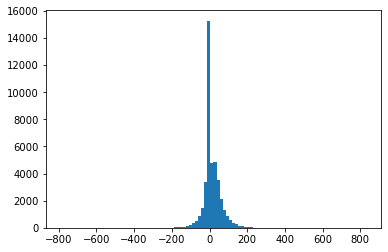

In [318]:
e_err = e_dist-e_sample
print(np.mean(e_err))
print(np.std(e_err, ddof=1))
plt.hist(e_err, bins=100)
plt.show()

0.0009832944410986897
0.1266475934790524


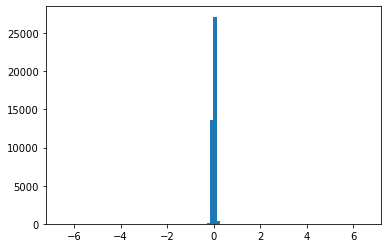

In [275]:
eta_err = eta_dist-eta_sample
print(np.mean(eta_err))
print(np.std(eta_err, ddof=1))
plt.hist(eta_err, bins=100)
plt.show()

8.087269794586879e-05
0.31825407374793546


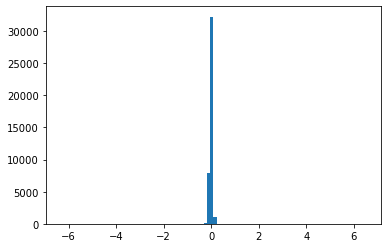

In [277]:
phi_err = phi_dist-eta_sample
print(np.mean(phi_err))
print(np.std(phi_err, ddof=1))
plt.hist(phi_err, bins=100)
plt.show()

In [53]:
def its(data, n_samples):
    hist, bins = np.histogram(data, bins='auto')
    bin_midpoints = bins[:-1] + np.diff(bins)/2
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    values = np.random.rand(n_samples)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = bin_midpoints[value_bins]
    return random_from_cdf

In [54]:
base_feature = 'ip'
df_temp = df_a1_a1[(df_a1_a1[base_feature+'_x_1'] != -9999) & (df_a1_a1['reco_'+base_feature+'_x_1'] != -9999)
                  & (df_a1_a1[base_feature+'_y_1'] != -9999) & (df_a1_a1['reco_'+base_feature+'_y_1'] != -9999)
                  & (df_a1_a1[base_feature+'_z_1'] != -9999) & (df_a1_a1['reco_'+base_feature+'_z_1'] != -9999)]
df_temp = df_temp[~((df_temp[base_feature+'_x_1']<1e-20) & (df_temp[base_feature+'_y_1']<1e-20) & (df_temp[base_feature+'_z_1']<1e-20))]
df_temp = df_temp[~((df_temp['reco_'+base_feature+'_x_1']<1e-20) & (df_temp['reco_'+base_feature+'_y_1']<1e-20) & (df_temp['reco_'+base_feature+'_z_1']<1e-20))]
reco_vertex = Momentum4(np.zeros(df_temp.shape[0]), df_temp['reco_'+base_feature+'_x_1'], df_temp['reco_'+base_feature+'_y_1'], df_temp['reco_'+base_feature+'_z_1'])
gen_vertex = Momentum4(np.zeros(df_temp.shape[0]),  df_temp[base_feature+'_x_1'], df_temp[base_feature+'_y_1'], df_temp[base_feature+'_z_1'])

phi_dist = gen_vertex.phi - reco_vertex.phi
p_mag_dist = gen_vertex.p - reco_vertex.p

gen_vertex_theta = gen_vertex.p_z/gen_vertex.p
reco_vertex_theta = reco_vertex.p_z/reco_vertex.p

theta_dist = gen_vertex_theta - reco_vertex_theta
phi_dist_sample = its(phi_dist, len(phi_dist))
theta_dist_sample =its(theta_dist, len(phi_dist))
p_mag_dist_sample =its(p_mag_dist, len(phi_dist))

7.234875320270556e-05
0.023557072184838095


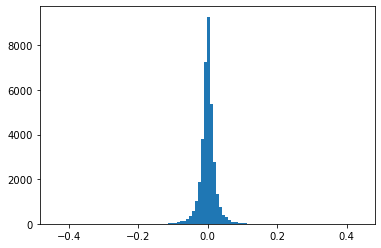

In [55]:
p_mag_err = p_mag_dist-p_mag_dist_sample
print(np.mean(p_mag_err))
print(np.std(p_mag_err, ddof=1))
plt.hist(p_mag_err, bins=100)
plt.show()

-0.00721931995260428
0.9977084761420559


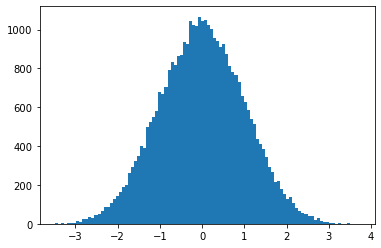

In [56]:
theta_err = theta_dist-theta_dist_sample
print(np.mean(theta_err))
print(np.std(theta_err, ddof=1))
plt.hist(theta_err, bins=100)
plt.show()

-0.006509351470668231
3.356862100474259


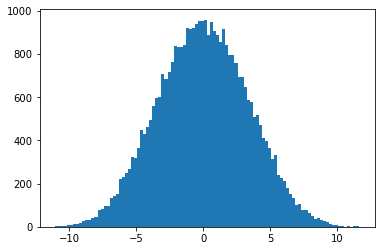

In [43]:
phi_err = phi_dist-phi_dist_sample
print(np.mean(phi_err))
print(np.std(phi_err, ddof=1))
plt.hist(phi_err, bins=100)
plt.show()

In [22]:
df_to_smear = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/df_to_smear.h5', 'df')

In [23]:
phi_dist_sample = its_2(phi_dist, df_to_smear.shape[0])
theta_dist_sample =its_2(theta_dist, df_to_smear.shape[0])
p_mag_dist_sample =its_2(p_mag_dist, df_to_smear.shape[0])

In [25]:
feature = 'ip_1'
label_parts = feature.split('_')
x_label = label_parts[0]+'_x_'+label_parts[1]
y_label = label_parts[0]+'_y_'+label_parts[1]
z_label = label_parts[0]+'_z_'+label_parts[1]
vertex = Momentum4(np.zeros(df.shape[0]), df_to_smear[x_label], df_to_smear[y_label], df_to_smear[z_label])
smeared_phi = vertex.phi + phi_dist_sample
smeared_theta = 2*np.arctan(np.exp(-vertex.eta)) + theta_dist_sample
smeared_p_mag = vertex.p + p_mag_dist_sample
smeared_p_x = smeared_p_mag*np.sin(smeared_theta)*np.cos(smeared_phi)
smeared_p_y = smeared_p_mag*np.sin(smeared_theta)*np.sin(smeared_phi)
smeared_p_z = smeared_p_mag*np.cos(smeared_theta)

/home/hep/shc3117/anaconda3/envs/msci/lib/python3.8/site-packages/pylorentz/__init__.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self._values = np.array(list(x))


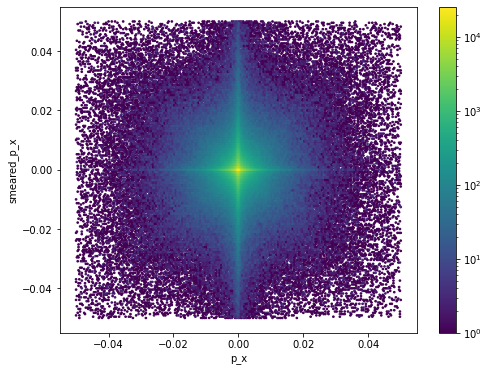

In [30]:
d = pd.DataFrame(np.c_[vertex.p_x, smeared_p_x])
d = d[(d[0] < 0.05) & (d[0] > -0.05) & (d[1] < 0.05) & (d[1] > -0.05)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=1, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('p_x')
plt.ylabel('smeared_p_x')
plt.show()

In [329]:
e_dist_sample = its_2(e_dist, df_to_smear.shape[0])
eta_dist_sample = its_2(eta_dist, df_to_smear.shape[0])
phi_dist_sample = its_2(phi_dist, df_to_smear.shape[0])

In [330]:
feature = 'pi_1'
label_parts = feature.split('_')
E_label = label_parts[0]+'_E_'+label_parts[1]
x_label = label_parts[0]+'_px_'+label_parts[1]
y_label = label_parts[0]+'_py_'+label_parts[1]
z_label = label_parts[0]+'_pz_'+label_parts[1]
particle = Momentum4(df_to_smear[E_label], df_to_smear[x_label], df_to_smear[y_label], df_to_smear[z_label])
# smeared_e = particle.e*(1+e_dist_sample)
smeared_e = particle.e + e_dist_sample
smeared_eta = particle.eta + eta_dist_sample
smeared_phi = particle.phi + phi_dist_sample
smeared_p_mag = np.sqrt(smeared_e**2 - particle_mass**2)
smeared_p_t = smeared_p_mag/np.cosh(smeared_eta)
smeared_particle = Momentum4.e_eta_phi_pt(smeared_e, smeared_eta, smeared_phi, smeared_p_t)

<ipython-input-330-3bf53bf824e6>:12: RuntimeWarning: invalid value encountered in sqrt
  smeared_p_mag = np.sqrt(smeared_e**2 - particle_mass**2)


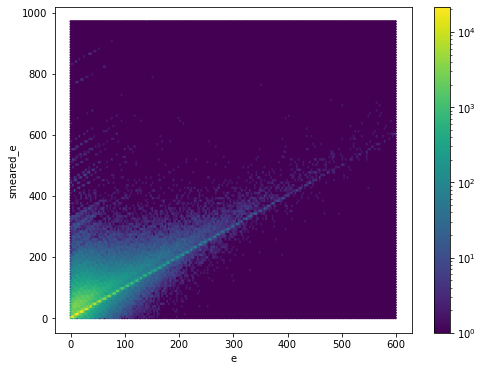

In [331]:
d = pd.DataFrame(np.c_[particle.e, smeared_e])
d = d[(d[0]<600) & (d[0]>0) & (d[1]<6000) & (d[1]>0)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('e')
plt.ylabel('smeared_e')
plt.show()

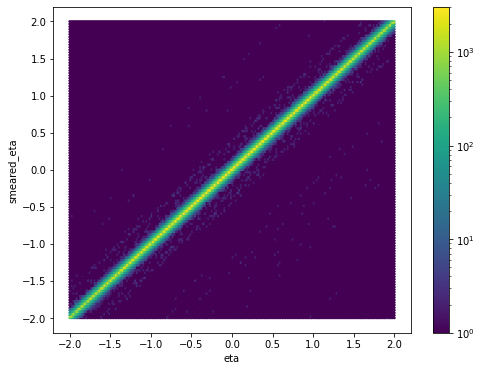

In [298]:
d = pd.DataFrame(np.c_[particle.eta, smeared_eta])
d = d[(d[0]<2) & (d[0]>-2) & (d[1]<2) & (d[1]>-2)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('eta')
plt.ylabel('smeared_eta')
plt.show()

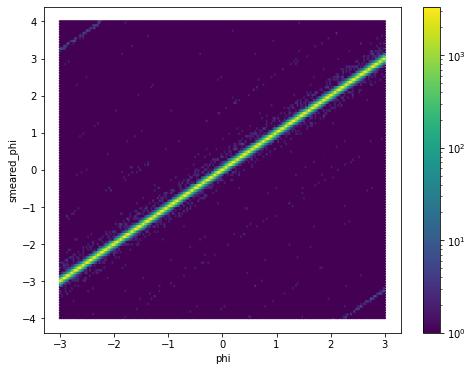

In [302]:
d = pd.DataFrame(np.c_[particle.phi, smeared_phi])
d = d[(d[0]<3) & (d[0]>-3) & (d[1]<4) & (d[1]>-4)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('phi')
plt.ylabel('smeared_phi')
plt.show()

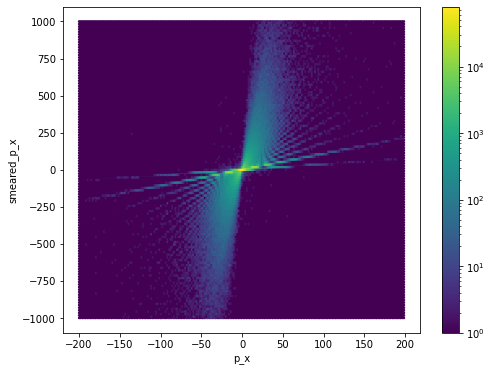

In [313]:
d = pd.DataFrame(np.c_[particle.p_x, smeared_particle.p_x])
d = d[(d[0]<200) & (d[0]>-200) & (d[1]<1000) & (d[1]>-1000)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('p_x')
plt.ylabel('smeared_p_x')
plt.show()

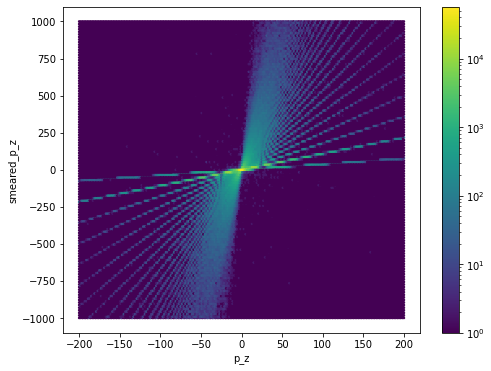

In [315]:
d = pd.DataFrame(np.c_[particle.p_z, smeared_particle.p_z])
d = d[(d[0]<200) & (d[0]>-200) & (d[1]<1000) & (d[1]>-1000)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('p_z')
plt.ylabel('smeared_p_z')
plt.show()

In [294]:
smeared_eta

array([ 0.52813542, -2.14646681, -0.55526769, ..., -1.3178091 ,
       -1.30654164, -1.04236583])

In [140]:
base_feature = 'ip'
df_gen_reco_temp = df[(df[base_feature+'_x_1'] != -9999) & (df['reco_'+base_feature+'_x_1'] != -9999)
               & (df[base_feature+'_y_1'] != -9999) & (df['reco_'+base_feature+'_y_1'] != -9999)
               & (df[base_feature+'_z_1'] != -9999) & (df['reco_'+base_feature+'_z_1'] != -9999)].reset_index(drop=True)
df_gen_reco_temp = df_gen_reco_temp.dropna()
reco_vertex = Momentum4(np.zeros(df.shape[0], dtype='float64'), np.array(df_gen_reco_temp['reco_'+base_feature+'_x_1'].to_numpy(), dtype='float64'), np.array(df_gen_reco_temp['reco_'+base_feature+'_y_1'].to_numpy(), dtype='float64'), np.array(df_gen_reco_temp['reco_'+base_feature+'_z_1'].to_numpy(), dtype='float64'))
gen_vertex = Momentum4(np.zeros(df.shape[0], dtype='float64'), np.array(df_gen_reco_temp[base_feature+'_x_1'].to_numpy(), dtype='float64'), np.array(df_gen_reco_temp[base_feature+'_y_1'].to_numpy(), dtype='float64'), np.array(df_gen_reco_temp[base_feature+'_z_1'].to_numpy(), dtype='float64'))


/home/hep/shc3117/anaconda3/envs/msci/lib/python3.8/site-packages/pylorentz/__init__.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self._values = np.array(list(x))


In [127]:
reco_eta - gen_eta

-inf

In [155]:
mask_eta = ~np.isfinite(reco_vertex.eta)|~np.isfinite(gen_vertex.eta)
reco_eta = reco_vertex.eta[~mask_eta]
gen_eta = gen_vertex.eta[~mask_eta]
eta_dist = reco_eta - gen_eta
mask_phi = ~np.isfinite(reco_vertex.phi)|~np.isfinite(gen_vertex.phi)
reco_phi = reco_vertex.eta[~mask_phi]
gen_phi = gen_vertex.eta[~mask_phi]
phi_dist = reco_phi - gen_phi

In [169]:
phi_dist = phi_dist[np.isfinite(phi_dist)]

In [171]:
min(phi_dist)

-13.43632029920837

In [158]:
(reco_vertex.phi- gen_vertex.phi).shape

(11318942,)

In [152]:
mask

array([False, False, False, ..., False, False, False])

In [139]:
reco_vertex.eta[np.isfinite(reco_vertex.eta)]

array([ 1.55461367, -0.64386401, -0.33244963, ...,  3.09562792,
        0.34659451,  0.47952046])

In [262]:
plt.hist(reco_eta - gen_eta)

ValueError: operands could not be broadcast together with shapes (11318939,) (47167,) 

In [120]:
type(reco_vertex.eta)

numpy.ndarray

In [119]:
type(gen_vertex.eta)

numpy.ndarray

In [112]:
df_gen_reco_temp

,rand,wt_cp_sm,wt_cp_ps,wt_cp_mm,pi_px_1,pi_py_1,pi_pz_1,pi_E_1,pi2_px_1,pi2_py_1,...,reco_metx,reco_mety,reco_pi_px_1,reco_pi_py_1,reco_pi_pz_1,reco_pi_E_1,reco_pi0_px_1,reco_pi0_py_1,reco_pi0_pz_1,reco_pi0_E_1
entry,,,,,,,,,,,,,,,,,,,,,
0,0.529761,1.601494,0.310697,0.581832,8.404180,6.915075,1.555936,10.994950,0.0,0.0,...,22.777118,2.571694,8.441962,6.941999,1.566363,11.042238,17.065550,14.638872,4.328637,22.897268
2,0.600541,0.145634,1.555381,0.524301,33.907569,22.022118,48.396957,63.063316,0.0,0.0,...,16.753761,26.357396,34.248133,21.900111,48.527971,63.305078,-9999.000000,-9999.000000,-9999.000000,-9999.000000
3,0.764755,1.487983,0.444336,1.316065,24.443190,-4.880136,-14.903323,29.041587,0.0,0.0,...,-4.400168,18.603947,23.859532,-4.751882,-14.532247,28.338372,3.882114,-0.445150,-2.175538,4.474386
7,0.221678,0.250608,0.003864,0.132644,67.092553,-9.231485,-22.248333,71.285614,0.0,0.0,...,-7.866197,31.801056,68.473253,-9.895530,-22.475525,72.743911,-9999.000000,-9999.000000,-9999.000000,-9999.000000
8,0.118858,1.211943,0.429135,0.105831,17.181737,-11.224436,34.474353,40.121073,0.0,0.0,...,23.920099,-17.662888,17.555287,-11.467361,35.217174,40.987282,11.897337,-7.893100,23.216629,27.255783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19123554,0.147097,0.067817,1.648905,0.649332,11.455138,-22.231602,21.059466,32.695335,0.0,0.0,...,-13.326001,-15.897089,11.742560,-22.846443,21.625790,33.578891,7.924025,-14.204569,13.779193,21.317699
19123555,0.226161,0.282667,1.316681,0.532847,10.344487,3.209120,0.932993,10.871836,0.0,0.0,...,35.694586,104.324107,10.296579,3.196219,0.921078,10.821423,50.662051,13.868286,2.761659,52.598647
19123556,0.430148,0.908689,0.341760,1.138433,42.140033,74.047921,-1.986735,85.222318,0.0,0.0,...,-7.591708,-30.542825,42.186587,74.340578,-2.191940,85.504700,-9999.000000,-9999.000000,-9999.000000,-9999.000000


In [110]:
df_gen_reco_temp['reco_'+base_feature+'_x_1'].to_numpy()

array([-0.00069794,  0.00283836, -0.00390109, ...,  0.00023636,
       -0.00066147, -0.00573338])

In [92]:
df_gen_reco_temp['reco_'+base_feature+'_x_1'].shape, df_gen_reco_temp['reco_'+base_feature+'_y_1'].shape, df_gen_reco_temp['reco_'+base_feature+'_z_1'].shape

((2103122,), (2103122,), (2103122,))

In [85]:
(df.reco_ip_x_1==-9999).sum()

7804577

In [55]:
df_rho_a1[(df_rho_a1.metx != -9999) & (df_rho_a1.reco_metx != -9999)]

entry
2           21.313398
8           16.996158
9            0.620951
45          -8.569969
49          -2.809451
              ...    
19123517     9.993825
19123520     8.718856
19123526    31.428253
19123540     1.680401
19123554   -29.907638
Name: metx, Length: 4011880, dtype: float64

In [46]:
df_rho_a1.shape

(5517306, 77)

In [33]:
df_rho_rho = df[(df['dm_1'] == 1) & (df['dm_2'] == 1)]

In [34]:
df_rho_rho = df_rho_rho.drop(['reco_sv_x_1', 'reco_sv_y_1', 'reco_sv_z_1',
                             'pi2_px_1','pi2_py_1','pi2_pz_1','pi2_E_1','pi3_px_1', 'pi3_py_1', 'pi3_pz_1', 'pi3_E_1',
                             'pi2_px_2', 'pi2_py_2', 'pi2_pz_2', 'pi2_E_2', 'pi3_px_2', 'pi3_py_2', 'pi3_pz_2', 'pi3_E_2', 'pi0_px_1',
                             ], axis=1)

In [35]:
# checking MET info
(df.metx - df.reco_metx)/df.metx

entry
0            -0.073741
1             1.814165
2             0.213933
3             1.721428
4           -26.501421
               ...    
19123556      1.885160
19123557      0.478351
19123558   -239.414345
19123559     -0.234290
19123560    490.868064
Length: 19123561, dtype: float64

In [36]:
(df_rho_rho == 0).sum()

rand                  0
wt_cp_sm              1
wt_cp_ps              0
wt_cp_mm              0
pi_px_1             319
pi_py_1             319
pi_pz_1             319
pi_E_1              252
pi_px_2             319
pi_py_2             319
pi_pz_2             319
pi_E_2              252
pi0_py_1            319
pi0_pz_1            319
pi0_E_1             252
pi0_px_2            319
pi0_py_2            319
pi0_pz_2            319
pi0_E_2             252
nu_px_1             319
nu_py_1             319
nu_pz_1             319
nu_E_1              319
nu_px_2             319
nu_py_2             319
nu_pz_2             319
nu_E_2              319
sv_x_1              319
sv_y_1              319
sv_z_1              348
sv_x_2              319
sv_y_2              321
sv_z_2              342
ip_x_1                0
ip_y_1                0
ip_z_1                0
ip_x_2                0
ip_y_2                0
ip_z_2                0
dm_1                  0
dm_2                  0
metx            

In [37]:
df.shape

(19123561, 77)

In [38]:
df_rho_rho[(df_rho_rho != -9999.0).all(1)]

,rand,wt_cp_sm,wt_cp_ps,wt_cp_mm,pi_px_1,pi_py_1,pi_pz_1,pi_E_1,pi_px_2,pi_py_2,...,reco_metx,reco_mety,reco_pi_px_1,reco_pi_py_1,reco_pi_pz_1,reco_pi_E_1,reco_pi0_px_1,reco_pi0_py_1,reco_pi0_pz_1,reco_pi0_E_1
entry,,,,,,,,,,,,,,,,,,,,,
0,0.529761,1.601494,0.310697,0.581832,8.404180,6.915075,1.555936,10.994950,-35.655722,-31.039530,...,22.777118,2.571694,8.441962,6.941999,1.566363,11.042238,17.065550,14.638872,4.328637,22.897268
3,0.764755,1.487983,0.444336,1.316065,24.443190,-4.880136,-14.903323,29.041587,-9.257474,-3.170107,...,-4.400168,18.603947,23.859532,-4.751882,-14.532247,28.338372,3.882114,-0.445150,-2.175538,4.474386
26,0.265558,0.097559,1.220078,0.888257,-30.361598,24.887077,-45.795520,60.319502,5.743575,-4.812580,...,22.855553,-11.304820,-30.062886,24.647282,-45.322473,59.711068,-10.014409,8.153324,-14.712737,19.576719
37,0.029581,1.873361,0.628985,1.144184,25.124117,-11.419798,-20.711580,34.505392,-2.099493,2.072754,...,23.957280,-1.657396,24.837628,-11.285337,-20.470978,34.107589,4.050087,-1.847847,-2.974647,5.355788
53,0.016156,1.604695,1.644624,1.553855,-43.350537,-16.686834,22.467560,51.599712,3.925524,1.446574,...,-17.396888,-6.966372,-44.297783,-17.058390,22.978978,52.738365,-13.033956,-5.522742,6.887171,15.742809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19123539,0.348177,0.329244,0.741613,0.858589,-17.171053,63.000634,86.592358,108.453589,-3.803768,-5.206595,...,-5.036643,-0.433350,-17.179913,63.012485,86.611657,108.477284,-3.171834,11.110264,15.255425,19.137520
19123553,0.993328,1.680099,0.345456,0.427561,-5.401129,-37.023264,-24.259346,44.591811,-30.927280,-16.407392,...,-49.303244,-75.670557,-5.392348,-36.857633,-24.155590,44.396785,-5.265202,-33.431482,-21.262853,39.968906
19123555,0.226161,0.282667,1.316681,0.532847,10.344487,3.209120,0.932993,10.871836,22.639038,13.095114,...,35.694586,104.324107,10.296579,3.196219,0.921078,10.821423,50.662051,13.868286,2.761659,52.598647


In [39]:
df_rho_rho = df_rho_rho[(df_rho_rho == -9999.0).sum(1) < 2]

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_rho_rho.iloc[1])

In [ ]:
reco_pi = Momentum4(df_rho_rho.reco_pi_E_1, df_rho_rho.reco_pi_px_1, df_rho_rho.reco_pi_py_1, df_rho_rho.reco_pi_pz_1,)
reco_pi_ang = np.array([reco_pi.eta, reco_pi.phi, reco_pi.p_t])

pi = Momentum4(df_rho_rho.pi_E_1, df_rho_rho.pi_px_1, df_rho_rho.pi_py_1, df_rho_rho.pi_pz_1,)
# pi_ang = np.array([pi.eta, pi.phi, pi.p_t])

In [ ]:
pi_eta_dist = reco_pi.eta - pi.eta

In [ ]:
pi_p_t_dist = reco_pi.p_t - pi.p_t

In [ ]:
cdf = np.cumsum(pi_p_t_dist)
cdf_y = cdf_y/cdf_y.max()

In [14]:
import numpy as np
import scipy.interpolate as interpolate

def inverse_transform_sampling(data, n_samples=1000):
    hist, bin_edges = np.histogram(data, bins='scott', density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

def its_2(data, n_samples):
    hist, bins = np.histogram(data, bins='scott')
    bin_midpoints = bins[:-1] + np.diff(bins)/2
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    values = np.random.rand(n_samples)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = bin_midpoints[value_bins]
    return random_from_cdf

In [ ]:
test = inverse_transform_sampling(pi_p_t_dist, n_samples=2983726)

In [ ]:
test2 = its_2(pi_p_t_dist, n_samples=2983726)

In [ ]:
plt.hist(test, alpha=0.5, bins='scott', density=True)
plt.hist(test2, alpha=0.5, bins='scott', density=True)
plt.hist(pi_p_t_dist, alpha=0.5, bins='scott', density=True)
plt.xlim(-5, 5)
plt.show()

In [ ]:
plt.hist(pi_p_t_dist-test2, bins='scott', alpha=0.5)
plt.hist(pi_p_t_dist-test, bins='scott', alpha=0.5)
plt.xlim(-10, 10)
plt.show()

In [ ]:
np.mean(pi_p_t_dist-test2), np.std(pi_p_t_dist-test2, ddof=1)

In [68]:
np.mean(pi_p_t_dist-test), np.std(pi_p_t_dist-test, ddof=1) # test 2 is a bit better

(0.005442701911110066, 9.506635913284997)

In [70]:
a = 'pi_2'

In [71]:
a.split('_')

['pi', '2']

In [ ]:
reco_pi_1 = Momentum4(df_rho_rho.reco_pi_E_1, df_rho_rho.reco_pi_px_1, df_rho_rho.reco_pi_py_1, df_rho_rho.reco_pi_pz_1,)
pi_1 = Momentum4(df_rho_rho.pi_E_1, df_rho_rho.pi_px_1, df_rho_rho.pi_py_1, df_rho_rho.pi_pz_1,)
e_dist = (reco_pi_1.e - pi_1.e)/pi_1.e
eta_dist = reco_pi_1.eta - pi_1.eta
phi_dist = reco_pi_1.phi - pi_1.phi

e_dist_sample = its_2(e_dist, df_rho_rho.shape[0])
eta_dist_sample = its_2(eta_dist, df_rho_rho.shape[0])
phi_dist_sample = its_2(phi_dist, df_rho_rho.shape[0])

smeared_e = pi_1.e*(1+e_dist_sample)
smeared_eta = pi_1.eta + eta_dist_sample
smeared_phi = pi_1.phi + phi_dist_sample
pi_mass = 0.13957
# e^2 = m^2 + p^2
smeared_p_mag = np.sqrt(smeared_e**2 - pi_mass**2)
smeared_p_t = smeared_p_mag/np.cosh(smeared_eta)
smeared_pi_1 = Momentum4.e_eta_phi_pt(smeared_e, smeared_eta, smeared_phi, smeared_p_t)

In [ ]:
smeared_e, smeared_p_mag

In [ ]:
(np.isnan(smeared_p_mag)).sum()

In [ ]:
np.isnan(smeared_pi_1).sum()/3

## check smeared dataframe

In [6]:
df_smeared = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/df_smeared.h5', 'df')

In [7]:
df_smeared.head()

,pi_E_1,pi_px_1,pi_py_1,pi_pz_1,pi0_E_1,pi0_px_1,pi0_py_1,pi0_pz_1,pi_E_2,pi_px_2,...,sv_z_1,sv_x_2,sv_y_2,sv_z_2,ip_x_1,ip_y_1,ip_z_1,ip_x_2,ip_y_2,ip_z_2
entry,,,,,,,,,,,,,,,,,,,,,
0,10.994950,8.404180,6.915075,1.555936,22.769319,16.963737,14.569723,4.287013,46.850081,-35.517062,...,0.005763,-0.581665,-0.513909,0.018126,-0.000145,-0.000131,0.001370,0.003816,-0.004227,0.007524
3,29.041587,24.443190,-4.880136,-14.903323,8.565440,7.234810,-1.743771,-4.238552,21.973095,-9.356741,...,-0.161944,-0.120283,-0.045656,-0.260196,-0.001405,-0.008424,0.000455,0.002407,-0.003642,-0.000548
16,10.037782,6.726276,6.604666,3.445747,49.058912,32.886199,32.946126,15.485779,0.621660,-54.469666,...,0.112015,-0.280071,0.057288,0.059971,0.002613,0.002036,-0.009003,-0.000280,-0.003034,0.001802
21,61.296869,-2.413211,30.969841,52.842521,4.134056,-0.268372,2.131055,3.529700,32.947940,3.177239,...,0.092998,0.429833,-1.008276,3.836661,-0.001196,0.000635,-0.000427,0.051821,0.007411,-0.003141
24,46.820840,21.968763,27.752590,-30.648634,9.237175,4.012812,5.591140,-6.159843,13.822463,11.453936,...,-0.095757,0.065669,0.054346,0.027046,-0.000886,-0.000582,-0.001162,0.000970,-0.001690,0.001236


In [8]:
df_orig = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/df_orig.h5', 'df')

In [9]:
df_orig.head()

,pi_E_1,pi_px_1,pi_py_1,pi_pz_1,pi0_E_1,pi0_px_1,pi0_py_1,pi0_pz_1,pi_E_2,pi_px_2,...,sv_z_1,sv_x_2,sv_y_2,sv_z_2,ip_x_1,ip_y_1,ip_z_1,ip_x_2,ip_y_2,ip_z_2
entry,,,,,,,,,,,,,,,,,,,,,
0,10.994950,8.404180,6.915075,1.555936,22.769319,16.963737,14.569723,4.287013,47.278106,-35.655722,...,0.005763,-0.581665,-0.513909,0.018126,-0.000145,-0.000131,0.001370,0.003816,-0.004227,0.007524
3,29.041587,24.443190,-4.880136,-14.903323,8.565440,7.234810,-1.743771,-4.238552,21.899677,-9.257474,...,-0.161944,-0.120283,-0.045656,-0.260196,-0.001405,-0.008424,0.000455,0.002407,-0.003642,-0.000548
16,10.037782,6.726276,6.604666,3.445747,49.058912,32.886199,32.946126,15.485779,57.100717,-54.699795,...,0.112015,-0.280071,0.057288,0.059971,0.002613,0.002036,-0.009003,-0.000280,-0.003034,0.001802
21,61.296869,-2.413211,30.969841,52.842521,4.134056,-0.268372,2.131055,3.529700,33.248954,3.150124,...,0.092998,0.429833,-1.008276,3.836661,-0.001196,0.000635,-0.000427,0.051821,0.007411,-0.003141
24,46.820840,21.968763,27.752590,-30.648634,9.237175,4.012812,5.591140,-6.159843,14.125586,10.222310,...,-0.095757,0.065669,0.054346,0.027046,-0.000886,-0.000582,-0.001162,0.000970,-0.001690,0.001236


In [40]:
(df_smeared.pi_E_2<0).sum()

0

In [191]:
df_smeared_2 = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/df_smeared_2.h5', 'df')

In [192]:
df_smeared_2.head()

,pi_E_1,pi_px_1,pi_py_1,pi_pz_1,pi0_E_1,pi0_px_1,pi0_py_1,pi0_pz_1,pi_E_2,pi_px_2,...,sv_z_1,sv_x_2,sv_y_2,sv_z_2,ip_x_1,ip_y_1,ip_z_1,ip_x_2,ip_y_2,ip_z_2
entry,,,,,,,,,,,,,,,,,,,,,
2,60.957818,32.819715,21.315276,46.737152,5.485953,3.003737,2.027137,4.116519,57.981778,-12.861472,...,0.067133,-0.085217,0.345833,0.142905,0.000306,0.000878,-0.000614,0.000013,0.000034,-0.000009
8,38.781549,16.587841,-10.836614,33.337672,44.213397,19.514065,-12.431794,37.675695,15.232968,-7.906226,...,0.519186,-0.304739,0.447951,0.130899,0.002414,0.002286,-0.000458,0.001727,-0.002418,0.000008
9,19.714300,-10.770839,0.953424,-16.483755,40.209390,-22.617084,1.782097,-33.197416,5.150426,3.701432,...,-0.163139,0.117789,-0.109993,0.000020,-0.002001,-0.001519,0.001218,0.001727,-0.002418,0.000008
11,15.662407,0.122887,3.638371,15.232816,108.315097,-0.875815,24.580520,105.485416,11.599532,-2.399663,...,2.893317,-0.049272,-0.192781,0.123580,-0.042384,-0.012463,0.003323,-0.000254,0.000397,0.000005
14,19.585824,10.193970,-3.454190,-16.362658,51.164261,26.523456,-7.682910,-43.072526,41.309644,-21.657565,...,-0.046327,-0.347826,0.039393,-0.570749,0.000225,0.000409,0.000054,-0.000597,-0.000029,-0.000244


In [193]:
np.isnan(df_smeared_2).sum()

pi_E_1        0
pi_px_1     434
pi_py_1     434
pi_pz_1     434
pi0_E_1       0
pi0_px_1    480
pi0_py_1    480
pi0_pz_1    480
pi_E_2        0
pi_px_2     629
pi_py_2     629
pi_pz_2     629
pi2_px_2    627
pi2_py_2    627
pi2_pz_2    627
pi2_E_2       0
pi3_px_2    588
pi3_py_2    588
pi3_pz_2    588
pi3_E_2       0
wt_cp_sm      0
wt_cp_ps      0
wt_cp_mm      0
rand          0
dm_1          0
dm_2          0
metx          0
mety          0
sv_x_1        0
sv_y_1        0
sv_z_1        0
sv_x_2        0
sv_y_2        0
sv_z_2        0
ip_x_1        0
ip_y_1        0
ip_z_1        0
ip_x_2        0
ip_y_2        0
ip_z_2        0
dtype: int64

In [20]:
df_orig_2 = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/df_orig_2.h5', 'df')

In [21]:
df_orig_2.head()

,pi_E_1,pi_px_1,pi_py_1,pi_pz_1,pi0_E_1,pi0_px_1,pi0_py_1,pi0_pz_1,pi_E_2,pi_px_2,...,sv_z_1,sv_x_2,sv_y_2,sv_z_2,ip_x_1,ip_y_1,ip_z_1,ip_x_2,ip_y_2,ip_z_2
entry,,,,,,,,,,,,,,,,,,,,,
0,11.031810,8.601286,7.091486,1.588702,22.769319,16.963737,14.569723,4.287013,47.278106,-35.655722,...,0.005763,-0.581665,-0.513909,0.018126,-0.000145,-0.000131,0.001370,0.003816,-0.004227,0.007524
3,29.138948,24.219107,-4.859920,-14.811875,8.565440,7.234810,-1.743771,-4.238552,21.899677,-9.257474,...,-0.161944,-0.120283,-0.045656,-0.260196,-0.001405,-0.008424,0.000455,0.002407,-0.003642,-0.000548
16,10.445014,6.444354,6.340330,3.310085,49.058912,32.886199,32.946126,15.485779,57.100717,-54.699795,...,0.112015,-0.280071,0.057288,0.059971,0.002613,0.002036,-0.009003,-0.000280,-0.003034,0.001802
21,60.741927,-2.528510,32.041724,54.712307,4.134056,-0.268372,2.131055,3.529700,33.248954,3.150124,...,0.092998,0.429833,-1.008276,3.836661,-0.001196,0.000635,-0.000427,0.051821,0.007411,-0.003141
24,46.977806,21.903567,27.726341,-30.568792,9.237175,4.012812,5.591140,-6.159843,14.125586,10.222310,...,-0.095757,0.065669,0.054346,0.027046,-0.000886,-0.000582,-0.001162,0.000970,-0.001690,0.001236


In [10]:
df_smeared_transformed = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/df_smeared_transformed.h5', 'df')

In [11]:
df_smeared_transformed.loc[4]

pi_E_1_br           3.092499e+01
pi_px_1_br         -3.295615e-01
pi_py_1_br         -6.911656e-02
pi_pz_1_br          3.092284e+01
pi_E_2_br           3.733529e+01
pi_px_2_br          1.463952e-01
pi_py_2_br         -1.082854e-01
pi_pz_2_br         -3.733459e+01
pi0_E_1_br          1.401122e+01
pi0_px_1_br         3.295615e-01
pi0_py_1_br         6.911656e-02
pi0_pz_1_br         1.400652e+01
pi0_E_2_br          7.598162e+00
pi0_px_2_br        -1.463952e-01
pi0_py_2_br         1.082854e-01
pi0_pz_2_br        -7.594781e+00
rho_E_1_br          4.493621e+01
rho_px_1_br        -2.664535e-15
rho_py_1_br        -1.332268e-15
rho_pz_1_br         4.492937e+01
rho_E_2_br          4.493345e+01
rho_px_2_br        -5.417888e-14
rho_py_2_br        -5.551115e-15
rho_pz_2_br        -4.492937e+01
aco_angle_1_calc    2.298003e+00
y_rho_1             3.752889e-01
y_rho_2             6.623195e-01
w_a                 1.696484e+00
w_b                 3.968583e-01
m_rho_1             7.843359e-01
m_rho_2   

In [12]:
df_orig_transformed = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/df_orig_transformed.h5', 'df')

In [13]:
df_orig_transformed.loc[4]

pi_E_1_br           3.111147e+01
pi_px_1_br         -3.418858e-01
pi_py_1_br         -4.846125e-02
pi_pz_1_br          3.110924e+01
pi_E_2_br           3.745352e+01
pi_px_2_br          1.465496e-01
pi_py_2_br         -1.080728e-01
pi_pz_2_br         -3.745282e+01
pi0_E_1_br          1.396716e+01
pi0_px_1_br         3.418858e-01
pi0_py_1_br         4.846125e-02
pi0_pz_1_br         1.396224e+01
pi0_E_2_br          7.622037e+00
pi0_px_2_br        -1.465496e-01
pi0_py_2_br         1.080728e-01
pi0_pz_2_br        -7.618666e+00
rho_E_1_br          4.507864e+01
rho_px_1_br         3.552714e-15
rho_py_1_br         3.996803e-15
rho_pz_1_br         4.507149e+01
rho_E_2_br          4.507556e+01
rho_px_2_br        -9.148238e-14
rho_py_2_br        -1.221245e-14
rho_pz_2_br        -4.507149e+01
aco_angle_1_calc    2.365364e+00
y_rho_1             3.791891e-01
y_rho_2             6.623195e-01
w_a                 1.696484e+00
w_b                 3.968583e-01
m_rho_1             8.029020e-01
m_rho_2   

In [113]:
(df_smeared_transformed==0).sum()

pi_E_1_br                 0
pi_px_1_br                0
pi_py_1_br                0
pi_pz_1_br                0
pi_E_2_br                 0
pi_px_2_br                0
pi_py_2_br                0
pi_pz_2_br                0
pi0_E_1_br                0
pi0_px_1_br               0
pi0_py_1_br               0
pi0_pz_1_br               0
pi0_E_2_br                0
pi0_px_2_br               0
pi0_py_2_br               0
pi0_pz_2_br               0
rho_E_1_br                0
rho_px_1_br          165823
rho_py_1_br          166960
rho_pz_1_br               0
rho_E_2_br                0
rho_px_2_br           19973
rho_py_2_br           19868
rho_pz_2_br               0
aco_angle_1_calc          2
y_rho_1                   0
y_rho_2                   0
w_a                       0
w_b                       0
m_rho_1                   0
m_rho_2                   0
sv_x_1                    0
sv_y_1                    0
sv_z_1                    0
sv_x_2                    0
sv_y_2              

In [108]:
df_smeared_transformed.shape, df_orig_transformed.shape

((2602666, 38), (5719875, 38))

In [14]:
df = df_smeared
pi_1 = Momentum4(df['pi_E_1'], df["pi_px_1"], df["pi_py_1"], df["pi_pz_1"])
pi_2 = Momentum4(df['pi_E_2'], df["pi_px_2"], df["pi_py_2"], df["pi_pz_2"])
pi0_1 = Momentum4(df['pi0_E_1'], df["pi0_px_1"], df["pi0_py_1"], df["pi0_pz_1"])
pi0_2 = Momentum4(df['pi0_E_2'], df["pi0_px_2"], df["pi0_py_2"], df["pi0_pz_2"])
rho_1 = pi_1 + pi0_1
rho_2 = pi_2 + pi0_2
# boost into rest frame of resonances
rest_frame = rho_1 + rho_2
boost = Momentum4(rest_frame[0], -rest_frame[1], -rest_frame[2], -rest_frame[3])

In [15]:
pi_1_boosted = pi_1.boost_particle(boost)
pi_2_boosted = pi_2.boost_particle(boost)
pi0_1_boosted = pi0_1.boost_particle(boost)
pi0_2_boosted = pi0_2.boost_particle(boost)
rho_1_boosted = pi_1_boosted + pi0_1_boosted
rho_2_boosted = pi_2_boosted + pi0_2_boosted

/home/hep/shc3117/anaconda3/envs/msci/lib/python3.8/site-packages/pylorentz/__init__.py:366: ComplexWarning: Casting complex values to real discards the imaginary part
  B[0, 1:, ] = bp
/home/hep/shc3117/anaconda3/envs/msci/lib/python3.8/site-packages/pylorentz/__init__.py:367: ComplexWarning: Casting complex values to real discards the imaginary part
  B[1:, 0, ] = bp


In [16]:
pi_1_boosted = pi_1.boost_particle(boost)

In [51]:
pi_1_boosted

Momentum4(array([13.6779592 +0.j, 35.23985262+0.j, 20.04467186+0.j, ...,
        4.45173197+0.j,  5.53304293+0.j, 23.40324791+0.j]), array([10.45229594+0.j, 29.88979733+0.j, 15.00669506+0.j, ...,
        0.28440974+0.j,  2.22431913+0.j, -7.55945899+0.j]), array([  8.80141434+0.j,   1.73381811+0.j, -11.0743429 +0.j, ...,
        -1.00239564+0.j,   4.76316943+0.j, -20.30653428+0.j]), array([ 0.59304575+0.j, 18.58552187+0.j, -7.34352931+0.j, ...,
        4.32582383+0.j, -1.72037951+0.j,  8.84261151+0.j]))

In [40]:
pi_1_boosted[3][np.iscomplex(pi_1_boosted[0])]

array([-8.06305269+15.07907507j, -1.63976769-38.57284081j,
       -1.42514689+10.96285921j, ...,  1.89933133+24.09688377j,
        3.22657205+24.03507787j, -4.63916728-15.04411134j])

In [49]:
pi_1_boosted[0].shape

(5861320,)

In [62]:
%timeit np.real(pi_1_boosted[~np.iscomplex(pi_1_boosted)]).reshape(4, -1)

556 ms ± 22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
def calculateRhoRhoData(df):
    pi_1 = Momentum4(df['pi_E_1'], df["pi_px_1"], df["pi_py_1"], df["pi_pz_1"])
    pi_2 = Momentum4(df['pi_E_2'], df["pi_px_2"], df["pi_py_2"], df["pi_pz_2"])
    pi0_1 = Momentum4(df['pi0_E_1'], df["pi0_px_1"], df["pi0_py_1"], df["pi0_pz_1"])
    pi0_2 = Momentum4(df['pi0_E_2'], df["pi0_px_2"], df["pi0_py_2"], df["pi0_pz_2"])
    rho_1 = pi_1 + pi0_1
    rho_2 = pi_2 + pi0_2
    # boost into rest frame of resonances
    rest_frame = rho_1 + rho_2
    boost = Momentum4(rest_frame[0], -rest_frame[1], -rest_frame[2], -rest_frame[3])
    pi_1_boosted = pi_1.boost_particle(boost)
    pi_2_boosted = pi_2.boost_particle(boost)
    pi0_1_boosted = pi0_1.boost_particle(boost)
    pi0_2_boosted = pi0_2.boost_particle(boost)
    rho_1_boosted = pi_1_boosted + pi0_1_boosted
    rho_2_boosted = pi_2_boosted + pi0_2_boosted

In [18]:
calculateRhoRhoData(df_smeared)

In [19]:
df = df_smeared_transformed.apply(np.real)

In [20]:
(df==0).sum()

pi_E_1_br                 0
pi_px_1_br                0
pi_py_1_br                0
pi_pz_1_br                0
pi_E_2_br                 0
pi_px_2_br                0
pi_py_2_br                0
pi_pz_2_br                0
pi0_E_1_br                0
pi0_px_1_br               0
pi0_py_1_br               0
pi0_pz_1_br               0
pi0_E_2_br                0
pi0_px_2_br               0
pi0_py_2_br               0
pi0_pz_2_br               0
rho_E_1_br                0
rho_px_1_br          240286
rho_py_1_br          241866
rho_pz_1_br               0
rho_E_2_br                0
rho_px_2_br           32985
rho_py_2_br           33185
rho_pz_2_br               0
aco_angle_1_calc          0
y_rho_1                   0
y_rho_2                   0
w_a                       0
w_b                       0
m_rho_1                   0
m_rho_2                   0
sv_x_1                    0
sv_y_1                    0
sv_z_1                    0
sv_x_2                    0
sv_y_2              

In [21]:
df.shape

(5718954, 38)

In [22]:
# df[(df == 0).sum(1) < 1]
(df[df['m_rho_1']!=0]==0).sum()

pi_E_1_br                 0
pi_px_1_br                0
pi_py_1_br                0
pi_pz_1_br                0
pi_E_2_br                 0
pi_px_2_br                0
pi_py_2_br                0
pi_pz_2_br                0
pi0_E_1_br                0
pi0_px_1_br               0
pi0_py_1_br               0
pi0_pz_1_br               0
pi0_E_2_br                0
pi0_px_2_br               0
pi0_py_2_br               0
pi0_pz_2_br               0
rho_E_1_br                0
rho_px_1_br          240286
rho_py_1_br          241866
rho_pz_1_br               0
rho_E_2_br                0
rho_px_2_br           32985
rho_py_2_br           33185
rho_pz_2_br               0
aco_angle_1_calc          0
y_rho_1                   0
y_rho_2                   0
w_a                       0
w_b                       0
m_rho_1                   0
m_rho_2                   0
sv_x_1                    0
sv_y_1                    0
sv_z_1                    0
sv_x_2                    0
sv_y_2              

In [102]:
[x for x in df_smeared_transformed.columns if x.startswith('m')]

['m_rho_1', 'm_rho_2']

In [23]:
pd_combined = pd.concat([df_orig_transformed, df_smeared_transformed], axis=1).dropna()

In [24]:
pd_combined.columns

Index(['pi_E_1_br', 'pi_px_1_br', 'pi_py_1_br', 'pi_pz_1_br', 'pi_E_2_br',
       'pi_px_2_br', 'pi_py_2_br', 'pi_pz_2_br', 'pi0_E_1_br', 'pi0_px_1_br',
       'pi0_py_1_br', 'pi0_pz_1_br', 'pi0_E_2_br', 'pi0_px_2_br',
       'pi0_py_2_br', 'pi0_pz_2_br', 'rho_E_1_br', 'rho_px_1_br',
       'rho_py_1_br', 'rho_pz_1_br', 'rho_E_2_br', 'rho_px_2_br',
       'rho_py_2_br', 'rho_pz_2_br', 'aco_angle_1_calc', 'y_rho_1', 'y_rho_2',
       'w_a', 'w_b', 'm_rho_1', 'm_rho_2', 'sv_x_1', 'sv_y_1', 'sv_z_1',
       'sv_x_2', 'sv_y_2', 'sv_z_2', 'y', 'pi_E_1_br', 'pi_px_1_br',
       'pi_py_1_br', 'pi_pz_1_br', 'pi_E_2_br', 'pi_px_2_br', 'pi_py_2_br',
       'pi_pz_2_br', 'pi0_E_1_br', 'pi0_px_1_br', 'pi0_py_1_br', 'pi0_pz_1_br',
       'pi0_E_2_br', 'pi0_px_2_br', 'pi0_py_2_br', 'pi0_pz_2_br', 'rho_E_1_br',
       'rho_px_1_br', 'rho_py_1_br', 'rho_pz_1_br', 'rho_E_2_br',
       'rho_px_2_br', 'rho_py_2_br', 'rho_pz_2_br', 'aco_angle_1_calc',
       'y_rho_1', 'y_rho_2', 'w_a', 'w_b', 'm_rho_1', 

In [25]:
pd_combined.pi_E_1_br.iloc[:,0]

0          13.699377
1          35.617754
2          16.675277
3          33.132770
4          31.111472
             ...    
5718949    20.897198
5718950    21.519172
5718951     0.317937
5718952    28.744248
5718953    10.895259
Name: pi_E_1_br, Length: 5718954, dtype: float64

In [26]:
pd_combined.pi_px_1_br

,pi_px_1_br,pi_px_1_br
0,0.367472,0.372327
1,0.105148,0.107190
2,-0.108377,-0.112742
3,0.202038,0.208193
4,-0.341886,-0.329561
...,...,...
5718949,-0.232390,0.215941
5718950,-0.048718,-0.137690
5718951,0.012771,-0.348233
5718952,-0.236955,0.091487


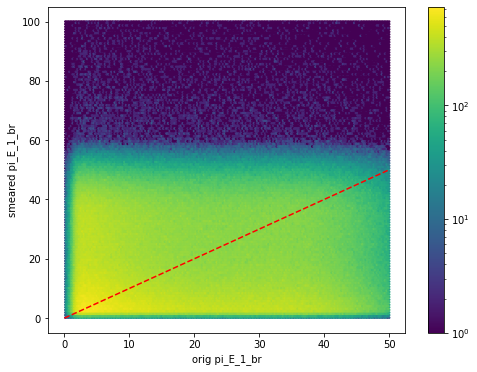

In [27]:
d = pd_combined.pi_E_1_br
d = d[(d.iloc[:,0]<50) & (d.iloc[:,0]>-0) & (d.iloc[:,1]<100) & (d.iloc[:,1]>-0)]
plt.figure(figsize=(8,6))
plt.hexbin(d.iloc[:,0], d.iloc[:,1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
plt.plot(np.linspace(0, 50), np.linspace(0, 50), '--r')
plt.xlabel('orig pi_E_1_br')
plt.ylabel('smeared pi_E_1_br')
plt.colorbar()
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/pi_E_1_br_hexbin')
plt.show()

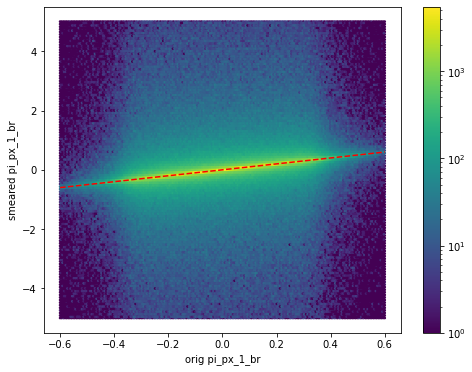

In [167]:
d = pd_combined.pi_px_1_br
d = d[(d.iloc[:,0]<0.6) & (d.iloc[:,0]>-0.6) & (d.iloc[:,1]<5) & (d.iloc[:,1]>-5)]
plt.figure(figsize=(8,6))
plt.hexbin(d.iloc[:,0], d.iloc[:,1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
plt.plot(np.linspace(-0.6, 0.6), np.linspace(-0.6, 0.6), '--r')
plt.xlabel('orig pi_px_1_br')
plt.ylabel('smeared pi_px_1_br')
plt.colorbar()
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/pi_px_1_br_hexbin')
plt.show()

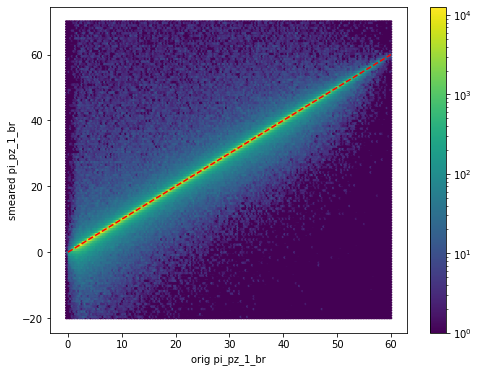

In [177]:
d = pd_combined.pi_pz_1_br
d = d[(d.iloc[:,0]<60) & (d.iloc[:,0]>-10) & (d.iloc[:,1]<70) & (d.iloc[:,1]>-20)]
plt.figure(figsize=(8,6))
plt.hexbin(d.iloc[:,0], d.iloc[:,1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
plt.plot(np.linspace(-0, 60), np.linspace(0, 60), '--r')
plt.xlabel('orig pi_pz_1_br')
plt.ylabel('smeared pi_pz_1_br')
plt.colorbar()
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/pi_pz_1_br_hexbin')
plt.show()

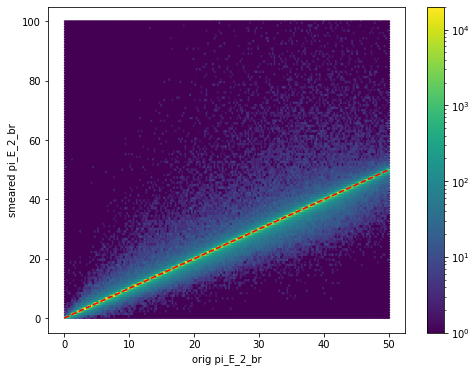

In [181]:
d = pd_combined.pi_E_2_br
d = d[(d.iloc[:,0]<50) & (d.iloc[:,0]>-0) & (d.iloc[:,1]<100) & (d.iloc[:,1]>-0)]
plt.figure(figsize=(8,6))
plt.hexbin(d.iloc[:,0], d.iloc[:,1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
plt.plot(np.linspace(0, 50), np.linspace(0, 50), '--r')
plt.xlabel('orig pi_E_2_br')
plt.ylabel('smeared pi_E_2_br')
plt.colorbar()
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/pi_E_2_br_hexbin')
plt.show()

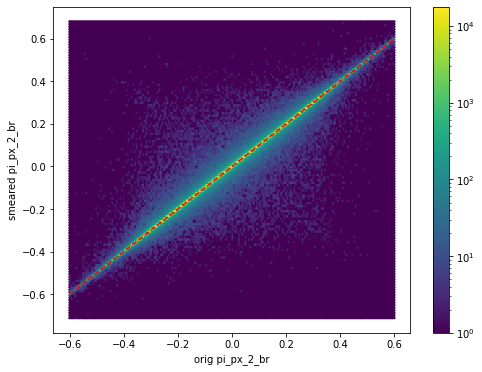

In [182]:
d = pd_combined.pi_px_2_br
d = d[(d.iloc[:,0]<0.6) & (d.iloc[:,0]>-0.6) & (d.iloc[:,1]<5) & (d.iloc[:,1]>-5)]
plt.figure(figsize=(8,6))
plt.hexbin(d.iloc[:,0], d.iloc[:,1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
plt.plot(np.linspace(-0.6, 0.6), np.linspace(-0.6, 0.6), '--r')
plt.xlabel('orig pi_px_2_br')
plt.ylabel('smeared pi_px_2_br')
plt.colorbar()
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/pi_px_2_br_hexbin')
plt.show()

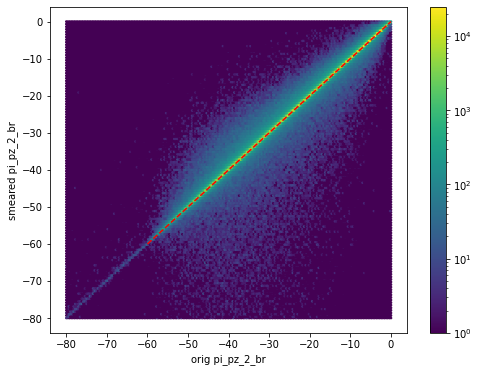

In [188]:
d = pd_combined.pi_pz_2_br
d = d[(d.iloc[:,0]<0) & (d.iloc[:,0]>-80) & (d.iloc[:,1]<0) & (d.iloc[:,1]>-80)]
plt.figure(figsize=(8,6))
plt.hexbin(d.iloc[:,0], d.iloc[:,1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
plt.plot(np.linspace(-60, 0), np.linspace(-60, 0), '--r')
plt.xlabel('orig pi_pz_2_br')
plt.ylabel('smeared pi_pz_2_br')
plt.colorbar()
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/pi_pz_2_br_hexbin')
plt.show()

## smearing patterns we should expect

In [40]:
df_rho_rho.columns

Index(['rand', 'wt_cp_sm', 'wt_cp_ps', 'wt_cp_mm', 'pi_px_1', 'pi_py_1',
       'pi_pz_1', 'pi_E_1', 'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi_E_2',
       'pi0_py_1', 'pi0_pz_1', 'pi0_E_1', 'pi0_px_2', 'pi0_py_2', 'pi0_pz_2',
       'pi0_E_2', 'nu_px_1', 'nu_py_1', 'nu_pz_1', 'nu_E_1', 'nu_px_2',
       'nu_py_2', 'nu_pz_2', 'nu_E_2', 'sv_x_1', 'sv_y_1', 'sv_z_1', 'sv_x_2',
       'sv_y_2', 'sv_z_2', 'ip_x_1', 'ip_y_1', 'ip_z_1', 'ip_x_2', 'ip_y_2',
       'ip_z_2', 'dm_1', 'dm_2', 'metx', 'mety', 'reco_ip_x_1', 'reco_ip_y_1',
       'reco_ip_z_1', 'reco_dm_1', 'reco_metx', 'reco_mety', 'reco_pi_px_1',
       'reco_pi_py_1', 'reco_pi_pz_1', 'reco_pi_E_1', 'reco_pi0_px_1',
       'reco_pi0_py_1', 'reco_pi0_pz_1', 'reco_pi0_E_1'],
      dtype='object')

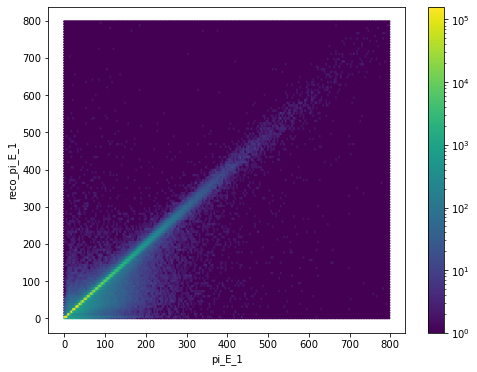

In [194]:
d = pd.DataFrame(np.c_[df_rho_rho.pi_E_1, df_rho_rho.reco_pi_E_1])
d = d[(d[0]<800) & (d[0]>-0) & (d[1]<800) & (d[1]>-0)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('pi_E_1')
plt.ylabel('reco_pi_E_1')
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/expected/expected_pi_E_1.png')
plt.show()

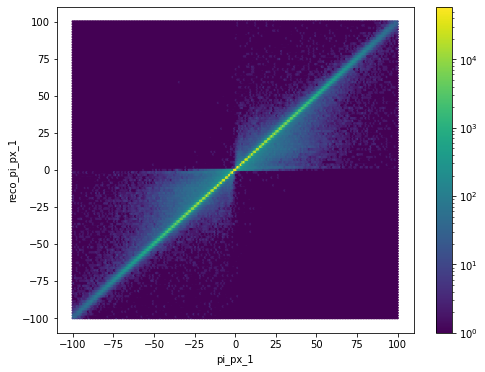

In [195]:
d = pd.DataFrame(np.c_[df_rho_rho.pi_px_1, df_rho_rho.reco_pi_px_1])
d = d[(d[0]<100) & (d[0]>-100) & (d[1]<100) & (d[1]>-100)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('pi_px_1')
plt.ylabel('reco_pi_px_1')
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/expected/expected_pi_px_1.png')
plt.show()

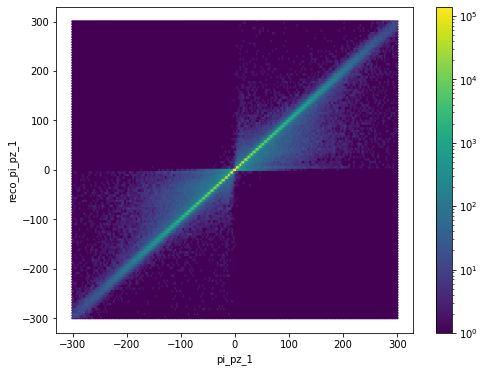

In [78]:
d = pd.DataFrame(np.c_[df_rho_rho.pi_pz_1, df_rho_rho.reco_pi_pz_1])
d = d[(d[0]<300) & (d[0]>-300) & (d[1]<300) & (d[1]>-300)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('pi_pz_1')
plt.ylabel('reco_pi_pz_1')
plt.show()

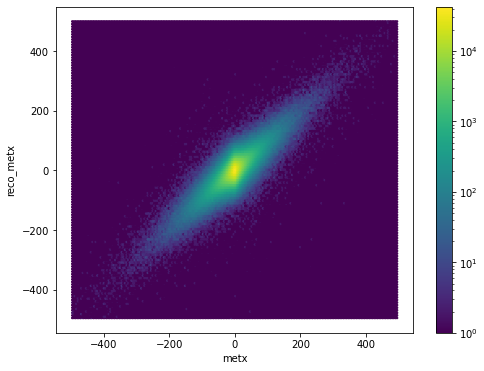

In [196]:
d = pd.DataFrame(np.c_[df_rho_rho.metx, df_rho_rho.reco_metx])
d = d[(d[0]<500) & (d[0]>-500) & (d[1]<500) & (d[1]>-500)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('metx')
plt.ylabel('reco_metx')
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/expected/expected_metx.png')
plt.show()

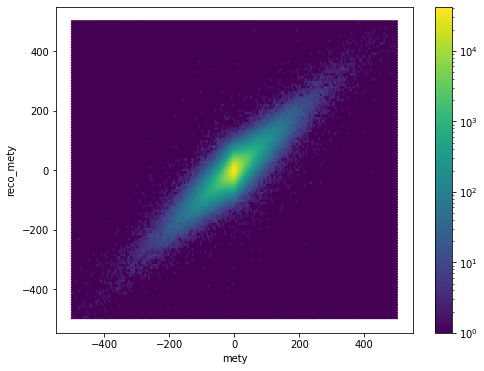

In [82]:
d = pd.DataFrame(np.c_[df_rho_rho.mety, df_rho_rho.reco_mety])
d = d[(d[0]<500) & (d[0]>-500) & (d[1]<500) & (d[1]>-500)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('mety')
plt.ylabel('reco_mety')
plt.show()

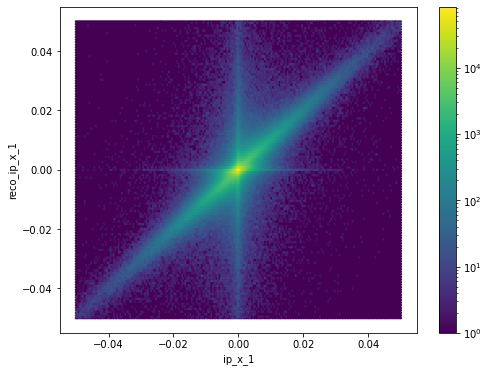

In [197]:
d = pd.DataFrame(np.c_[df_rho_rho.ip_x_1, df_rho_rho.reco_ip_x_1])
d = d[(d[0]<0.05) & (d[0]>-0.05) & (d[1]<0.05) & (d[1]>-0.05)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('ip_x_1')
plt.ylabel('reco_ip_x_1')
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/expected/expected_ip_x_1.png')
plt.show()

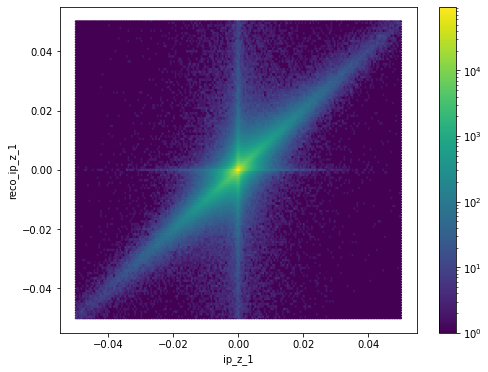

In [198]:
d = pd.DataFrame(np.c_[df_rho_rho.ip_z_1, df_rho_rho.reco_ip_z_1])
d = d[(d[0]<0.05) & (d[0]>-0.05) & (d[1]<0.05) & (d[1]>-0.05)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('ip_z_1')
plt.ylabel('reco_ip_z_1')
plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/expected/expected_ip_z_1.png')
plt.show()

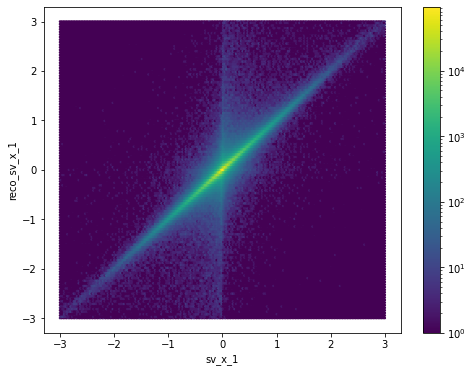

In [101]:
d = pd.DataFrame(np.c_[df.sv_x_1, df.reco_sv_x_1])
d = d[(d[0]<3) & (d[0]>-3) & (d[1]<3) & (d[1]>-3)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('sv_x_1')
plt.ylabel('reco_sv_x_1')
plt.show()

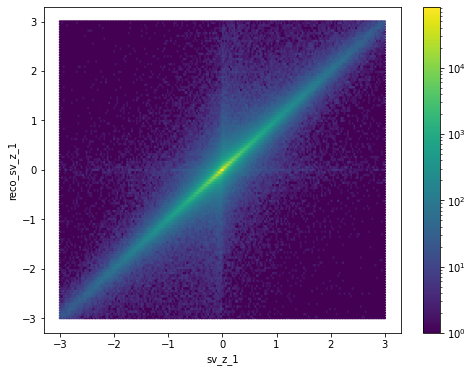

In [100]:
d = pd.DataFrame(np.c_[df.sv_z_1, df.reco_sv_z_1])
d = d[(d[0]<3) & (d[0]>-3) & (d[1]<3) & (d[1]>-3)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('sv_z_1')
plt.ylabel('reco_sv_z_1')
plt.show()

In [4]:
df_reco = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/input_df_reco/input_rho_rho_neutrino_met_ip_sv_b.h5', 'df')

In [5]:
df_reco.shape

(949753, 60)

In [9]:
df_reco = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/input_df_reco/input_rho_a1_neutrino_met_ip_sv_b.h5', 'df')

In [10]:
df_reco.shape

(507946, 129)

In [7]:
df_reco = pd.read_hdf('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/input_df_reco/input_a1_a1_neutrino_met_ip_sv_b.h5', 'df')

In [ ]:
df_reco.shape

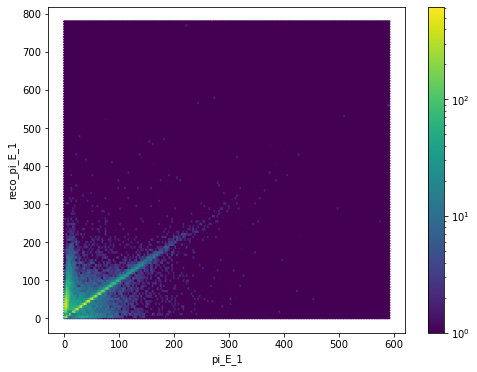

In [261]:
d = pd.DataFrame(np.c_[df_a1_a1.pi_E_1, df_a1_a1.reco_pi_E_1])
d = d[(d[0]<800) & (d[0]>-0) & (d[1]<800) & (d[1]>-0)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('pi_E_1')
plt.ylabel('reco_pi_E_1')
# plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/expected/expected_pi_E_1.png')
plt.show()

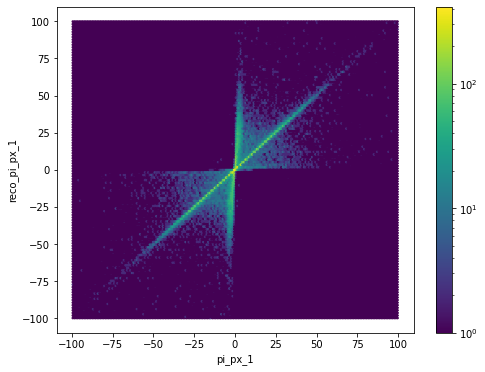

In [260]:
d = pd.DataFrame(np.c_[df_a1_a1.pi_px_1, df_a1_a1.reco_pi_px_1])
d = d[(d[0]<100) & (d[0]>-100) & (d[1]<100) & (d[1]>-100)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('pi_px_1')
plt.ylabel('reco_pi_px_1')
# plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/expected/expected_pi_px_1.png')
plt.show()

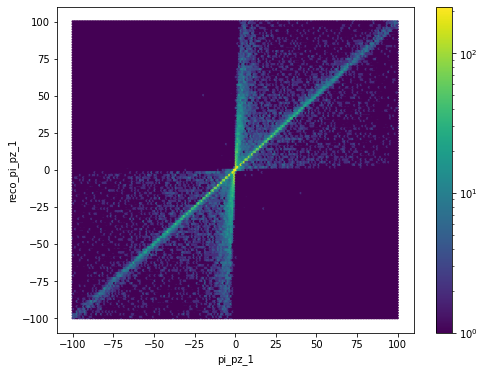

In [316]:
d = pd.DataFrame(np.c_[df_a1_a1.pi_pz_1, df_a1_a1.reco_pi_pz_1])
d = d[(d[0]<100) & (d[0]>-100) & (d[1]<100) & (d[1]>-100)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('pi_pz_1')
plt.ylabel('reco_pi_pz_1')
# plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/expected/expected_pi_px_1.png')
plt.show()

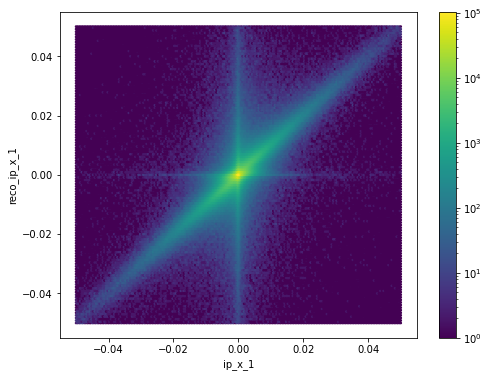

In [264]:
d = pd.DataFrame(np.c_[df_a1_a1.ip_x_1, df_a1_a1.reco_ip_x_1])
d = d[(d[0]<0.05) & (d[0]>-0.05) & (d[1]<0.05) & (d[1]>-0.05)]
plt.figure(figsize=(8,6))
plt.hexbin(d[0], d[1], cmap='viridis', mincnt=None, gridsize=200, bins='log')
# plt.plot(np.linspace(0, 800), np.linspace(0, 800), 'r')
plt.colorbar()
plt.xlabel('ip_x_1')
plt.ylabel('reco_ip_x_1')
# plt.savefig('/home/hep/shc3117/MSci-Project-HiggsTauTau/shared/smearing/fig/expected/expected_ip_x_1.png')
plt.show()